In [11]:
import pandas as pd

# Load the uploaded CSV file
file_path = "CSV Files\Linkedin_poll.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Quiz_number      100 non-null    int64 
 1   Total_Views      100 non-null    int64 
 2   Total_Responses  100 non-null    int64 
 3   Right_Answers    100 non-null    int64 
 4   Total_Likes      100 non-null    int64 
 5   Avg_right        100 non-null    object
 6   Max_Right        100 non-null    object
dtypes: int64(5), object(2)
memory usage: 5.6+ KB


<>:4: SyntaxWarning: invalid escape sequence '\L'
<>:4: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5256\2557358642.py:4: SyntaxWarning: invalid escape sequence '\L'
  file_path = "CSV Files\Linkedin_poll.csv"


(None,
    Quiz_number  Total_Views  Total_Responses  Right_Answers  Total_Likes  \
 0            1       134100             3486           1424           84   
 1            2       172686             5669           4093          139   
 2            3       113495             2128           1175           74   
 3            4        73924              347            142           33   
 4            5       100538             1559            917           54   
 
   Avg_right Max_Right  
 0       41%       Yes  
 1       72%       Yes  
 2       55%       Yes  
 3       41%       Yes  
 4       59%       Yes  )

In [ ]:
# Convert 'Avg_right' to numeric by removing the '%' sign
df['Avg_right'] = df['Avg_right'].str.replace('%', '').astype(float)

# Check if the data is correctly converted
df.head()


,Quiz_number,Total_Views,Total_Responses,Right_Answers,Total_Likes,Avg_right,Max_Right
0,1,134100,3486,1424,84,41.0,Yes
1,2,172686,5669,4093,139,72.0,Yes
2,3,113495,2128,1175,74,55.0,Yes
3,4,73924,347,142,33,41.0,Yes
4,5,100538,1559,917,54,59.0,Yes


In [13]:
# Ensure 'Total_Likes' is numeric and replace any non-numeric values
df["Total_Likes"] = pd.to_numeric(df["Total_Likes"], errors="coerce")

# Drop any NaN values that might exist after conversion
df = df.dropna(subset=["Total_Likes"])

# Ensure 'Total_Likes' is an integer type (convert if needed)
df["Total_Likes"] = df["Total_Likes"].astype(int)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5256\3322113925.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Total_Likes"], shade=True, ax=axes[2, 1])


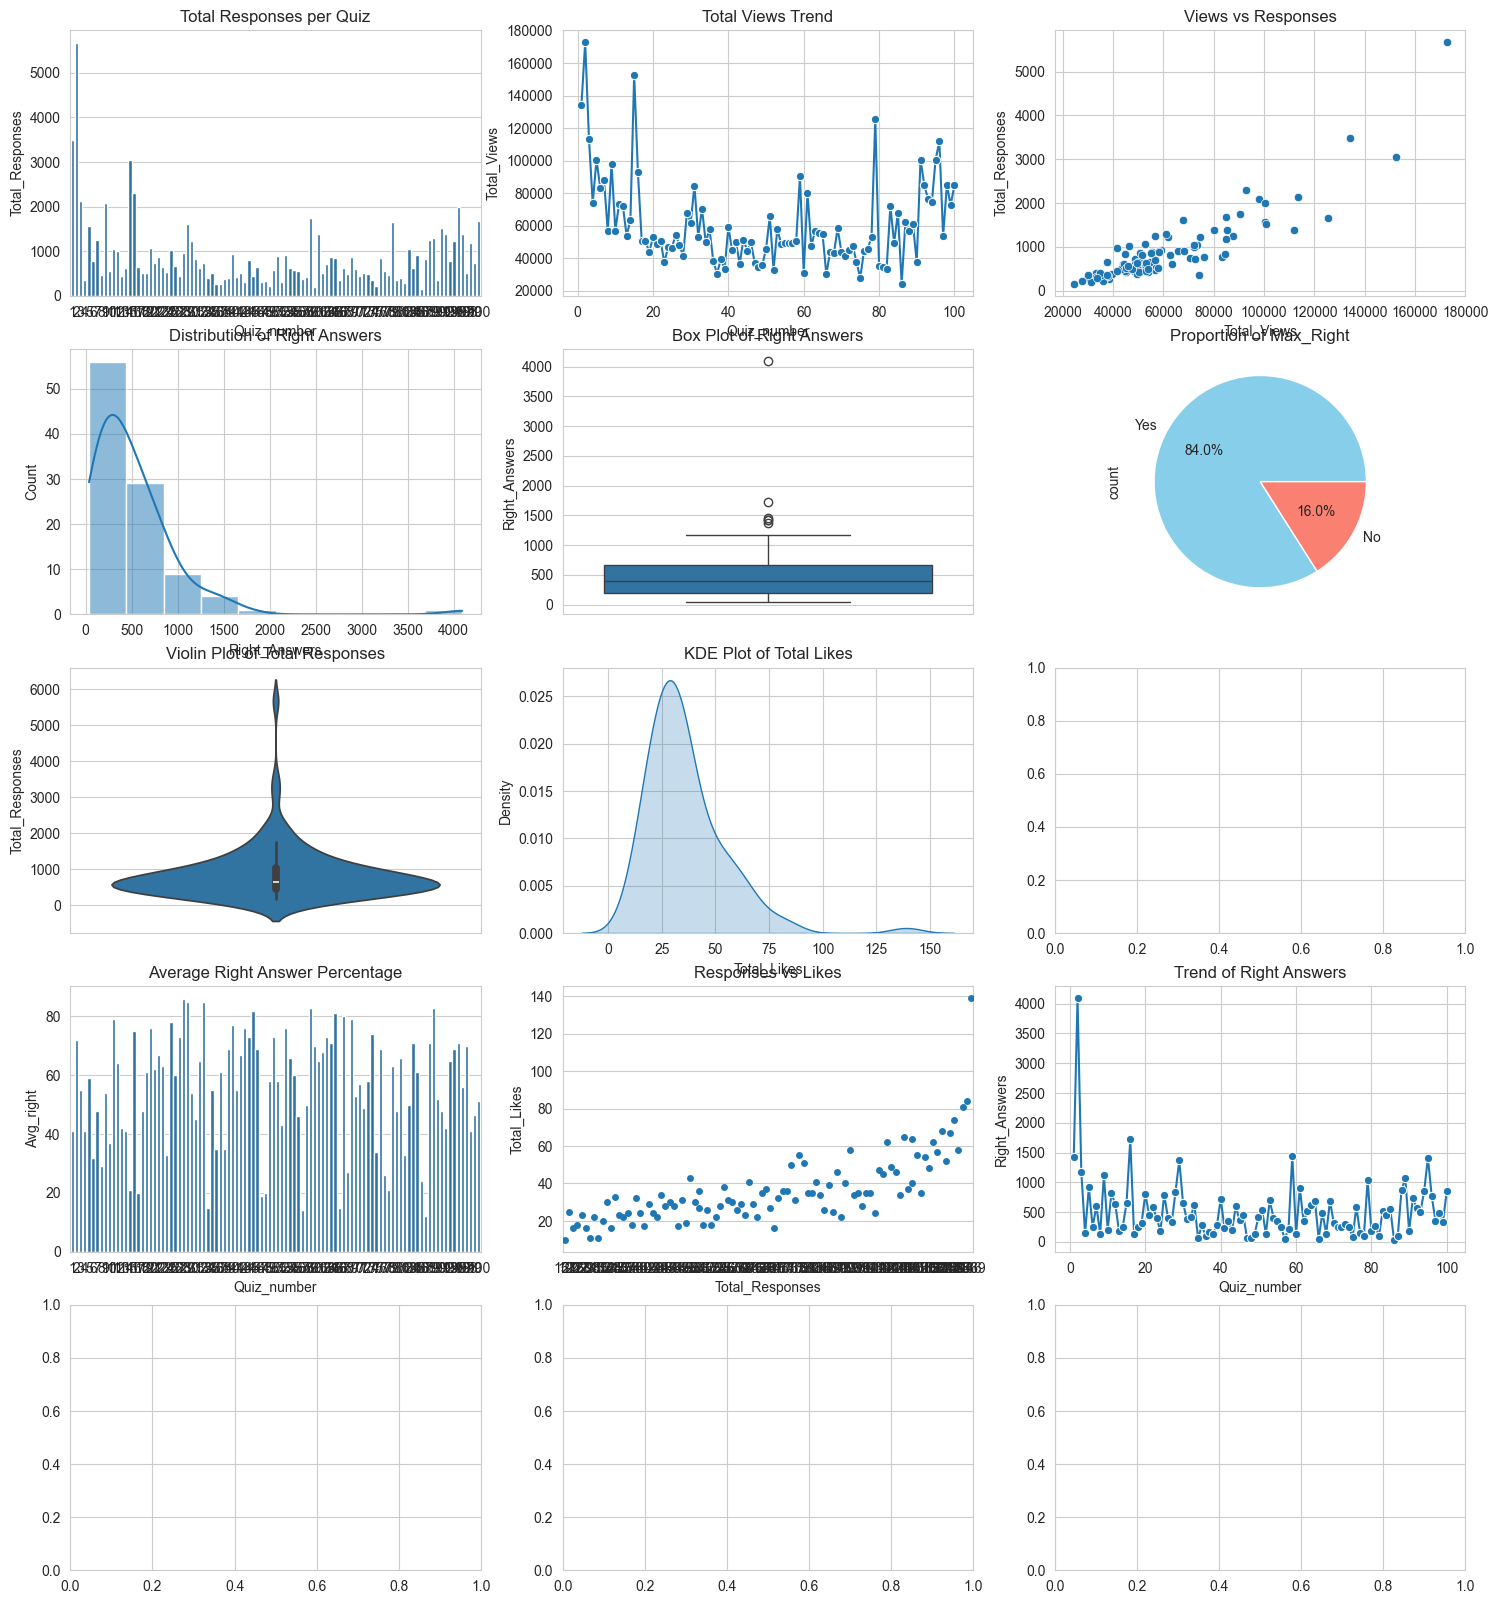

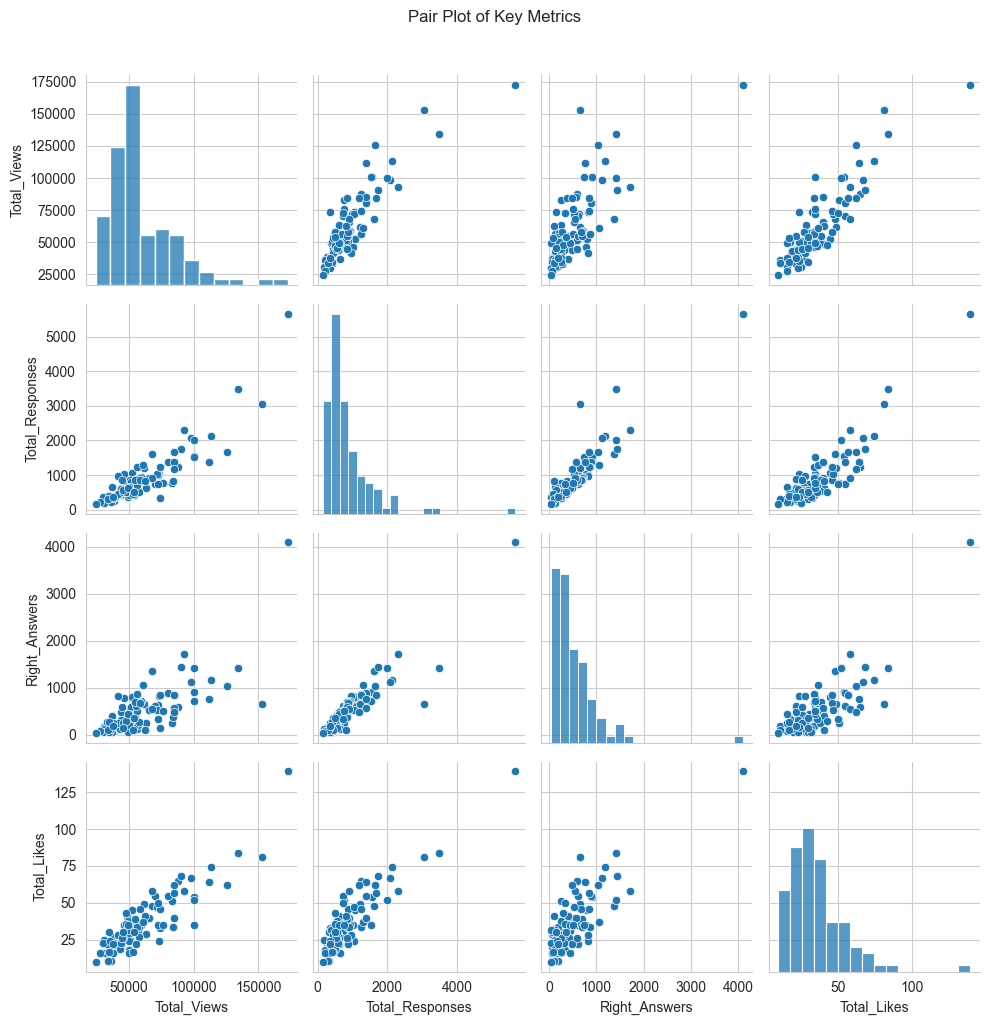

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 20))

# 1. Bar Plot - Total Responses per Quiz
sns.barplot(data=df, x="Quiz_number", y="Total_Responses", ax=axes[0, 0])
axes[0, 0].set_title("Total Responses per Quiz")

# 2. Line Plot - Total Views over Quiz Number
sns.lineplot(data=df, x="Quiz_number", y="Total_Views", ax=axes[0, 1], marker="o")
axes[0, 1].set_title("Total Views Trend")

# 3. Scatter Plot - Total Views vs Total Responses
sns.scatterplot(data=df, x="Total_Views", y="Total_Responses", ax=axes[0, 2])
axes[0, 2].set_title("Views vs Responses")

# 4. Histogram - Distribution of Right Answers
sns.histplot(df["Right_Answers"], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Right Answers")

# 5. Box Plot - Right Answers Distribution
sns.boxplot(data=df, y="Right_Answers", ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of Right Answers")

# 6. Pie Chart - Proportion of Max_Right (Yes/No)
df["Max_Right"].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[1, 2], colors=["skyblue", "salmon"])
axes[1, 2].set_title("Proportion of Max_Right")

# 7. Violin Plot - Total Responses
sns.violinplot(data=df, y="Total_Responses", ax=axes[2, 0])
axes[2, 0].set_title("Violin Plot of Total Responses")

# 8. KDE Plot - Total Likes Distribution
sns.kdeplot(df["Total_Likes"], shade=True, ax=axes[2, 1])
axes[2, 1].set_title("KDE Plot of Total Likes")

# 9. Bar Plot - Avg Right Percentage per Quiz
sns.barplot(data=df, x="Quiz_number", y="Avg_right", ax=axes[3, 0])
axes[3, 0].set_title("Average Right Answer Percentage")

# 10. Pair Plot - Relationship between Variables
sns.pairplot(df[["Total_Views", "Total_Responses", "Right_Answers", "Total_Likes"]])
plt.suptitle("Pair Plot of Key Metrics", y=1.02)

# 11. Swarm Plot - Responses vs Likes
sns.swarmplot(data=df, x="Total_Responses", y="Total_Likes", ax=axes[3, 1])
axes[3, 1].set_title("Responses vs Likes")

# 12. Line Plot - Right Answers Trend Over Quizzes
sns.lineplot(data=df, x="Quiz_number", y="Right_Answers", ax=axes[3, 2], marker="o")
axes[3, 2].set_title("Trend of Right Answers")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
